# Keras MNIST tutorial

https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import keras.callbacks

Using TensorFlow backend.


### Load MNIST dataset

In [3]:
import os
from urllib import urlretrieve

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# We then define functions for loading MNIST images and labels.
# For convenience, they also download the requested files if needed.
import gzip

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, we reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, we convert them to float32 in range [0,1].
    # (Actually to range [0, 255/256], for compatibility to the version
    # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
    return data / np.float32(256)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now, that's exactly what we want.
    return data

In [4]:
X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [ ]:
# Load pre-shuffled MNIST data into train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2],X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2],X_test.shape[3])

In [7]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


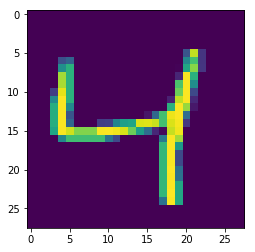

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

### Change images data array shape for ~~Theano~~ TF backend

Need to define images depth as 2-nd shape dimension.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [ ]:
print X_train.shape
print X_test.shape

In [ ]:
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
print y_train.shape
print y_train[:10]

## Convert labels to 10 distinct class labels (one-hot)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
print Y_train.shape
# (60000, 10)

# Step 7. Define model architecture

In [ ]:
model = None
model = Sequential()

*dim_ordering="th" needed:*  
*https://github.com/fchollet/keras/issues/3945*,  
*ref: https://keras.io/layers/convolutional/#convolution2d*

dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. It defaults to the image_dim_ordering value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "tf".

Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

https://keras.io/layers/convolutional/#conv2d

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1)))

In [ ]:
print model.output_shape

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

## Prepare callback for Tensorboard

In [ ]:
tb_cb = keras.callbacks.TensorBoard(log_dir="/root/keras/logs/03", histogram_freq=1, write_graph=True, write_images=True)
cbks = [tb_cb]

# Step 9. Fit model on training data

In [ ]:
samples = 1000
history = model.fit(X_train[:samples], Y_train[:samples], 
          batch_size=32, nb_epoch=12, verbose=1, callbacks=cbks)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

# Step 10. Evaluate model on test data

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print score